In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

#2. Load the dataset

In [95]:
rv=pd.read_csv(r"/content/Mall_Customers.csv")
rv.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#3. Perform Below Visualizations

#a) Univariate Analysis

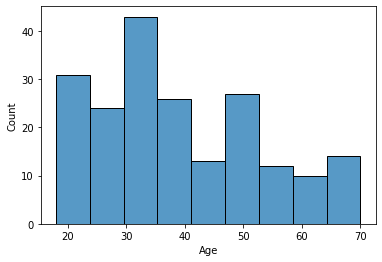

In [96]:
sns.histplot(rv['Age'])

#b) Bi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


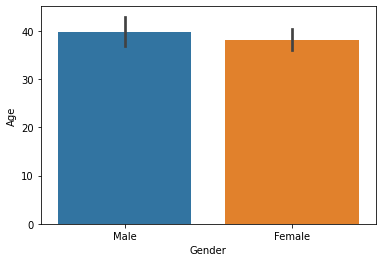

In [99]:
sns.barplot(rv['Gender'],rv['Age'])

#c)Multi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


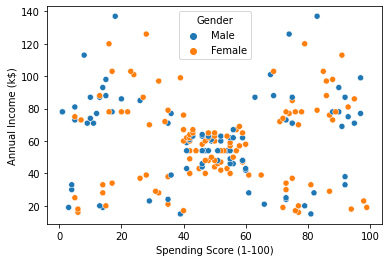

In [103]:
sns.scatterplot(rv['Spending Score (1-100)'],rv['Annual Income (k$)'],rv['Gender'])

#4. Perform descriptive statistics on the dataset

In [104]:
rv.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#5. Check for Missing values and deal with them.

In [105]:
rv.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#6. Find the outliers and replace them outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


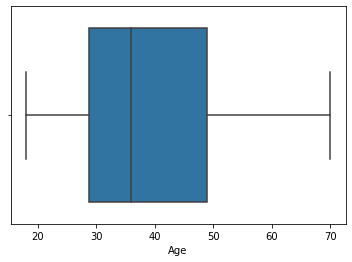

In [121]:
sns.boxplot(rv['Age'])

In [122]:
q=rv.quantile([0.85,0.45])
q

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.85,170.15,54.15,7.0,7.0
0.45,90.55,35.00,7.0,7.0


In [123]:
iqr=q.iloc[0]-q.iloc[1]
iqr

CustomerID                79.60
Age                       19.15
Annual Income (k$)         0.00
Spending Score (1-100)     0.00
dtype: float64

In [124]:
u=q.iloc[0]+(1.5*iqr)
u

CustomerID                289.550
Age                        82.875
Annual Income (k$)          7.000
Spending Score (1-100)      7.000
dtype: float64

In [125]:
l=q.iloc[1]-(1.5*iqr)
l

CustomerID               -28.850
Age                        6.275
Annual Income (k$)         7.000
Spending Score (1-100)     7.000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


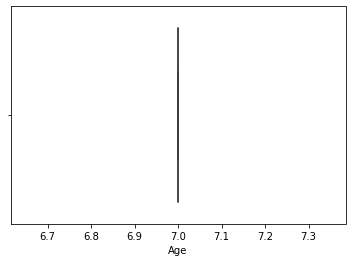

In [127]:
rv['Age']=np.where(rv['Age']>10,7,rv['Age'])
sns.boxplot(rv['Age'])

#7. Check for Categorical columns and perform encoding.

In [129]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lE=LabelEncoder()
oHE=OneHotEncoder()
rv['Gender']=lE.fit_transform(rv['Gender'])
rv.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,7,7,7
1,2,1,7,7,7
2,3,0,7,7,6
3,4,0,7,7,7
4,5,0,7,7,7


#8. Scaling the data

In [130]:
x=rv.drop('Age',axis=1)
y=rv['Age']
x

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,1,1,7,7
1,2,1,7,7
2,3,0,7,6
3,4,0,7,7
4,5,0,7,7
...,...,...,...,...
195,196,0,7,7
196,197,0,7,7
197,198,1,7,7
198,199,1,7,7


In [131]:
y

0      7
1      7
2      7
3      7
4      7
      ..
195    7
196    7
197    7
198    7
199    7
Name: Age, Length: 200, dtype: int64

In [132]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
SS=StandardScaler()
x_scale=SS.fit_transform(x)
x_scale

array([[-1.7234121 ,  1.12815215,  0.        ,  0.13536205],
       [-1.70609137,  1.12815215,  0.        ,  0.13536205],
       [-1.68877065, -0.88640526,  0.        , -1.04169925],
       [-1.67144992, -0.88640526,  0.        ,  0.13536205],
       [-1.6541292 , -0.88640526,  0.        ,  0.13536205],
       [-1.63680847, -0.88640526,  0.        ,  0.13536205],
       [-1.61948775, -0.88640526,  0.        , -1.04169925],
       [-1.60216702, -0.88640526,  0.        ,  0.13536205],
       [-1.5848463 ,  1.12815215,  0.        , -4.57288316],
       [-1.56752558, -0.88640526,  0.        ,  0.13536205],
       [-1.55020485,  1.12815215,  0.        ,  0.13536205],
       [-1.53288413, -0.88640526,  0.        ,  0.13536205],
       [-1.5155634 , -0.88640526,  0.        ,  0.13536205],
       [-1.49824268, -0.88640526,  0.        ,  0.13536205],
       [-1.48092195,  1.12815215,  0.        ,  0.13536205],
       [-1.46360123,  1.12815215,  0.        ,  0.13536205],
       [-1.4462805 , -0.

#9. Perform any of the clustering algorithms

In [135]:
from sklearn.cluster import KMeans
km=KMeans()
clustering=km.fit_predict(x_scale)
clustering

array([4, 4, 0, 0, 0, 0, 0, 0, 6, 0, 4, 0, 0, 0, 4, 4, 0, 4, 4, 0, 4, 4,
       6, 4, 0, 4, 0, 4, 0, 0, 6, 0, 6, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 4, 4, 0, 0, 4, 4,
       5, 5, 4, 5, 4, 5, 5, 5, 4, 4, 5, 4, 5, 5, 4, 4, 4, 5, 5, 4, 5, 5,
       5, 5, 5, 4, 4, 5, 5, 4, 5, 5, 4, 4, 5, 5, 1, 1, 1, 5, 5, 1, 1, 1,
       1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5, 1, 1, 1, 1, 7, 1,
       2, 2, 6, 2, 2, 1, 7, 2, 6, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 3, 2, 3, 2, 2, 2, 6, 2, 1, 2, 1, 2, 2, 1, 1, 1, 7, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 1], dtype=int32)

#10. Add the cluster data with the primary dataset

In [136]:
rv.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [137]:
rv1=pd.DataFrame(x_scale,columns=['Gender','Age','Annual Income (k$)','Spending Score (1-100)'])
rv1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,0.0,0.135362
1,-1.706091,1.128152,0.0,0.135362
2,-1.688771,-0.886405,0.0,-1.041699
3,-1.671450,-0.886405,0.0,0.135362
4,-1.654129,-0.886405,0.0,0.135362


In [138]:
rv1['Clust']=pd.Series(clustering)
rv1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clust
0,-1.723412,1.128152,0.0,0.135362,4
1,-1.706091,1.128152,0.0,0.135362,4
2,-1.688771,-0.886405,0.0,-1.041699,0
3,-1.671450,-0.886405,0.0,0.135362,0
4,-1.654129,-0.886405,0.0,0.135362,0


#11. Split the data into dependent and independent variables.

In [139]:
x=rv1.iloc[:,0:4]
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,0.0,0.135362
1,-1.706091,1.128152,0.0,0.135362
2,-1.688771,-0.886405,0.0,-1.041699
3,-1.671450,-0.886405,0.0,0.135362
4,-1.654129,-0.886405,0.0,0.135362
...,...,...,...,...
195,1.654129,-0.886405,0.0,0.135362
196,1.671450,-0.886405,0.0,0.135362
197,1.688771,1.128152,0.0,0.135362
198,1.706091,1.128152,0.0,0.135362


In [141]:
y=rv1['Clust']
y

0      4
1      4
2      0
3      0
4      0
      ..
195    2
196    2
197    1
198    1
199    1
Name: Clust, Length: 200, dtype: int32

#12. Split the data into training and testing

In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.3,random_state=1)

#13. Build the Model

#14. Train the Model

In [153]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

#15. Test the Model

In [154]:
pred_test=dtr.predict(x_test)
pred_test

array([0., 0., 0., 1., 2., 1., 4., 0., 0., 2., 1., 4., 0., 5., 1., 5., 2.,
       0., 2., 4., 4., 0., 0., 5., 0., 1., 0., 0., 2., 4., 0., 2., 2., 1.,
       1., 5., 2., 5., 5., 1., 1., 1., 2., 4., 0., 0., 5., 0., 1., 5., 4.,
       1., 5., 4., 4., 1., 2., 5., 1., 7.])

In [155]:
y_test

58     0
40     0
34     0
102    1
184    2
198    1
95     4
4      0
29     0
168    2
171    1
18     4
11     0
89     5
110    1
118    5
159    2
35     0
136    2
59     4
51     4
16     0
44     0
94     5
31     0
162    6
38     0
28     0
193    2
27     4
47     0
165    2
194    2
177    1
176    1
97     5
174    2
73     5
69     5
172    7
108    1
107    1
189    2
14     4
56     0
19     0
114    5
39     0
185    1
124    5
98     4
123    1
119    5
53     4
33     4
179    1
181    2
106    5
199    1
138    7
Name: Clust, dtype: int32

#16. Measure the performance using Evaluation Metrics.

In [156]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_test,y_test)

0.9666666666666667